<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="10px"; height="100px">
        </CENTER>
        <h1 style="font-size:1vw">
        <CENTER><b>CIÊNCIA DE DADOS</b></CENTER>
        <CENTER><b>ANÁLISE DE SÉRIE TEMPORAL</b></CENTER>
  </body>
</html>

**NOME:** Dylan Faria Robson

**LINK PARA ESTE NOTEBOOK:** [Aqui!](https://colab.research.google.com/drive/1WDzFhSgZ0pCxHNqsS43nkfcczq5LeRz5?usp=sharing)

# BIBLIOTECAS E FUNÇÕES

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [ ]:
def Estacionariedade(ts):
  resultados = adfuller(ts, autolag='AIC')
  print('DADOS ESTATÍSTICOS IMPORTANTES:')
  print(f'Estatística ADS: {resultados[0]: .2f}')
  print(f'Valor p: {resultados[1]: .10f}')
  print(f'Número de Atrasos: {resultados[2]}')
  print('Valores Críticos: ')
  for key, value in resultados[4].items():
    print(f'{key}: {value: .2f}')
  return resultados

In [ ]:
def PlotarSerie(ts, title = None, yLabel = None, xLabel = None):
  ts.plot(figsize = [15, 6])
  resultados = Estacionariedade(ts)
  plt.title(f'SÉRIE TEMPORAL: $p$ Value: {resultados[1]: .5f}: Mean ($\mu$): {ts.mean(): .2f}')
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.hlines(ts.mean(), ts.index[0], ts.index[len(ts) - 1], colors='red', linestyles = '--')
  plt.show()

In [ ]:
def CALCULAR_EQM (Y, Y_HAT):
  """
  DOCSTRING:
  Y: Valor Real da SÉRIE TEMPORAL.
  Y_HAT: VALOR ESTIMADO (com ou sem a Janela Móvel) da SÉRIE TEMPORAL.

  -> SE Y e Y_HAT tiverem o mesmo TAMANHO; ENTÃO: Cálculo Direto

  -> CASO CONTRÁRIO; Fatiar pelo tamanho da MENOR SÉRIE (geralmente o Y_HAT, pois será menos a JANELA MÓVEL)
  """
  len_Y = len(Y)
  len_Y_HAT = len(Y_HAT)
  if (len_Y == len_Y_HAT):
    return np.sum((Y - Y_HAT) ** 2) / len(Y_HAT)
  elif (len_Y > len_Y_HAT):
    Y_without_window = Y[len(Y) - len(Y_HAT):]
    Y_without_window = Y_without_window.reset_index(drop=True) # DROPAR A COLUNA INDEX
    return np.sum((Y_without_window - Y_HAT) ** 2) / len(Y_HAT)
  else:
    return None

In [ ]:
def questao1(y=None, n=10):
  '''
  DOCSTRING:
  y= valor verificado.
  n -> Numero de janelas verificadas. Por padrão é 10.

  return: melhor valor de n.
  grafico EQM X Tamanho da janela.
  '''

  #Verificando o melhor valor da janela.
  window = []
  EQMs = []
  min_eqm = 10000 #Inicialização da variavel.
  for i in range(2, n +1, 1):
    y_Hat = y.rolling(i).mean()
    EQM = CALCULAR_EQM (y, y_Hat)
    if EQM < min_eqm:
      min_eqm = i
    window.append(i)
    EQMs.append(EQM)

  #Plots!
  print(f'--------------------------------------------------\nO melhor valor para o intervalo de janela é: {min_eqm}\n--------------------------------------------------')
  fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15, 10) )
  sns.lineplot(x=window, y=EQMs, color='g', ax=ax1)
  ax1.set_ylabel('EQM')
  ax1.set_xlabel('Tamanho da Janela')
  ax1.set_title('EQM X Tamanho de Janela')

  rolling_mean = pd.DataFrame(columns=["Month", "Sunspots"])
  _ = dataset['Sunspots'].rolling(min_eqm).mean()
  rolling_mean['Month']= dataset['Month']
  rolling_mean['Sunspots'] = _
  sns.lineplot(data=rolling_mean, x='Month', y='Sunspots', color='b', ax=ax2)
  ax2.set_title(f'Media Movel Sunspots Janela = {min_eqm}')

  plt.tight_layout()
  plt.show()

  return min_eqm

In [ ]:
def questao2(dataset=None, n=None):
  '''
  DOCSTRING:
  dataset -> dataset
  n -> intervalo utilizado na media movel.

  return:
  Graficos com análise de tedência.
  '''
  dts = dataset.set_index('Month')
  PlotarSerie(dts.Sunspots)
  tendencia = dts.Sunspots.rolling(n).mean()
  tendencia.plot(figsize = [15, 6])
  plt.title('ANÁLISE DE TENDÊNCIA')
  plt.show()

In [ ]:
def questao3(dataset):
  '''
  DOCSTRING:
  dataset -> dataset

  return: grafico de sazonalidade
  '''

  sazonalidade = pd.DataFrame(columns=["Month", "Sunspots"])

  sazonalidade['Sunspots'] = dataset['Sunspots'].diff()
  sazonalidade['Month'] = dataset['Month']

  fig = plt.figure(figsize = [15, 6])
  ax =sns.lineplot(data=sazonalidade, x='Month', y='Sunspots', color='purple')
  ax.set_title('Sazonalidade Sunspots X Month')

LOAD: LISTAS DAS SÉRIE: Todas as series estão aqui: [Link](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/)

1.   SÉRIE 1: Shampoo Sales Dataset
2.   SÉRIE 2: Minimum Daily Temperatures Dataset
2.   SÉRIE 3: Monthly Sunspot Dataset
2.   SÉRIE 4: Daily Female Births Dataset
2.   SÉRIE 5: Produção de veículos automotores no Brasil: [Link](http://api.bcb.gov.br/dados/serie/bcdata.sgs.1373/dados?formato=csv)

In [ ]:
#Dataset3 -> Monthly Sunspot
dataset = pd.read_csv('/content/table3.csv', sep=";")
dataset.Month = pd.to_datetime(dataset.Month)
dataset.head()


,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


#Questão 1:

Faça o ajuste da JANELA MÓVEL protando o gráfico: EQM X JANELA MÓVEL.

Faça a plotagem da melhor: JANELA MÓVEL.

--------------------------------------------------
O melhor valor para o intervalo de janela é: 2
--------------------------------------------------


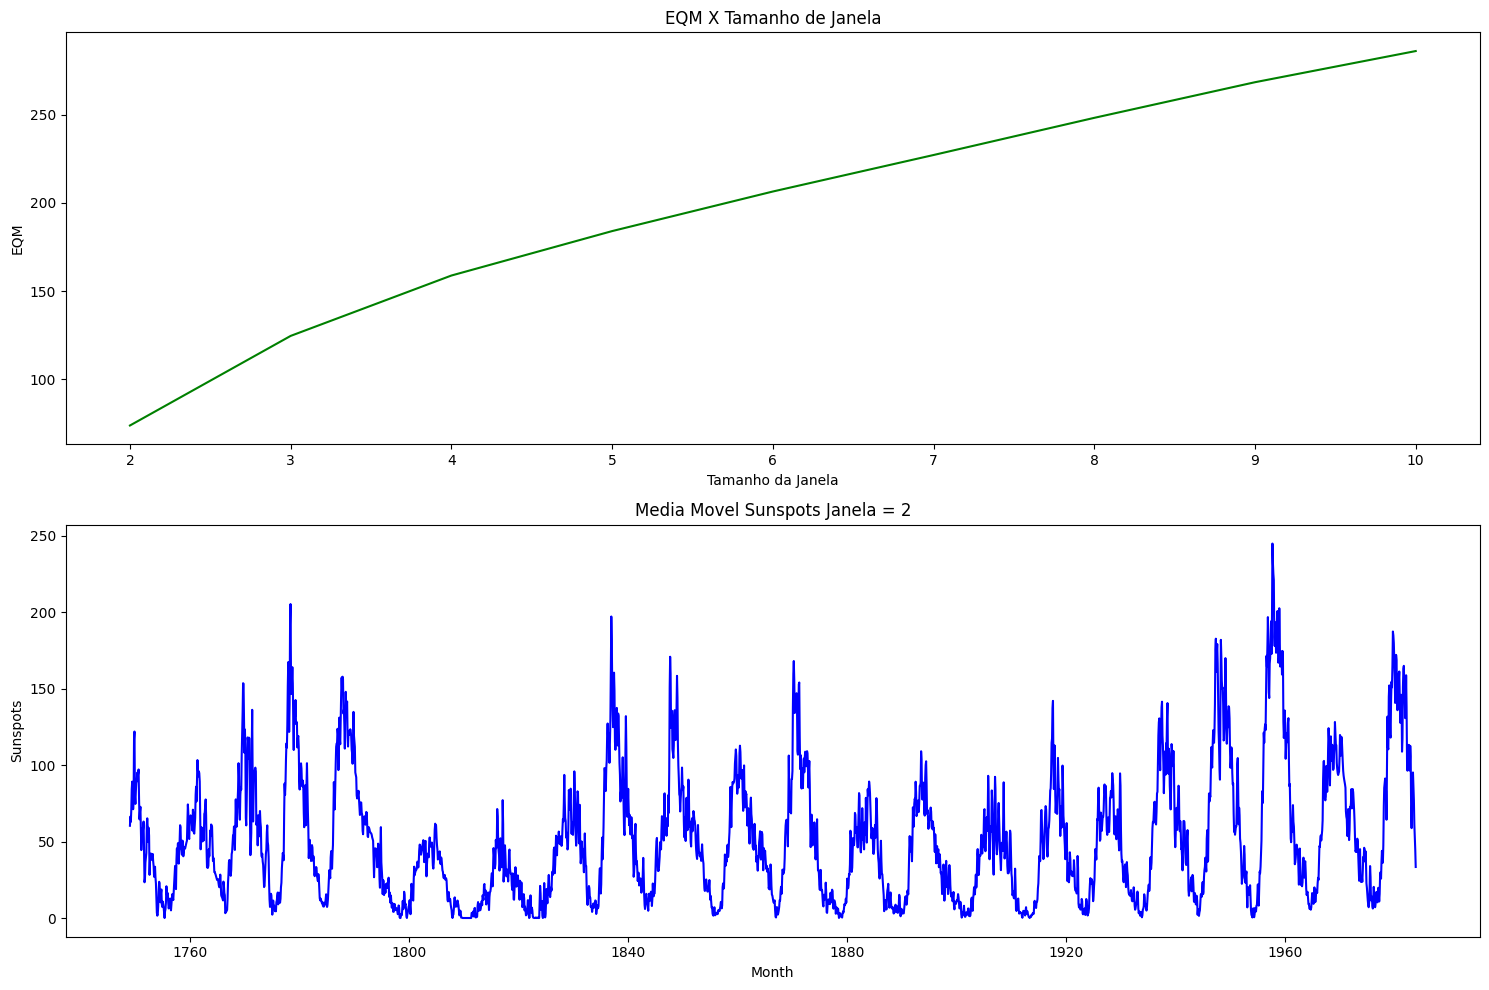

In [ ]:
#Retorna a melhor janela de tempo com o menor EQM
min_eqm = questao1(y=dataset['Sunspots'])

#Questão 2:

Faça a Análise de TENDÊNCIA.

DADOS ESTATÍSTICOS IMPORTANTES:
Estatística ADS: -9.57
Valor p:  0.0000000000
Número de Atrasos: 27
Valores Críticos: 
1%: -3.43
5%: -2.86
10%: -2.57


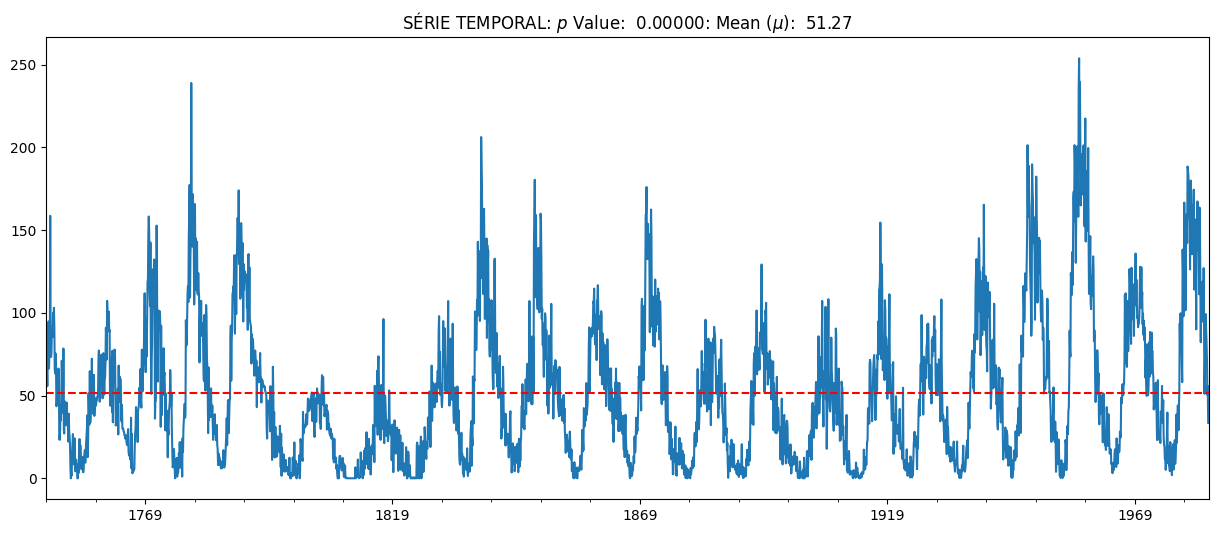

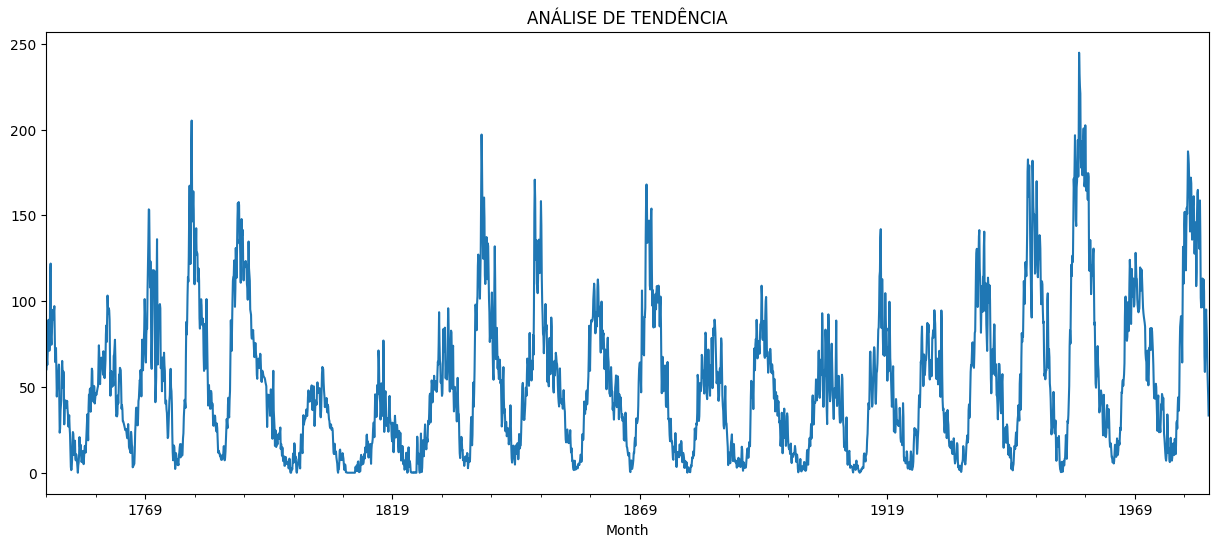

In [ ]:
questao2(dataset=dataset, n=min_eqm)

#Questão 3:

Faça a Análise de SAZONALIDADE.

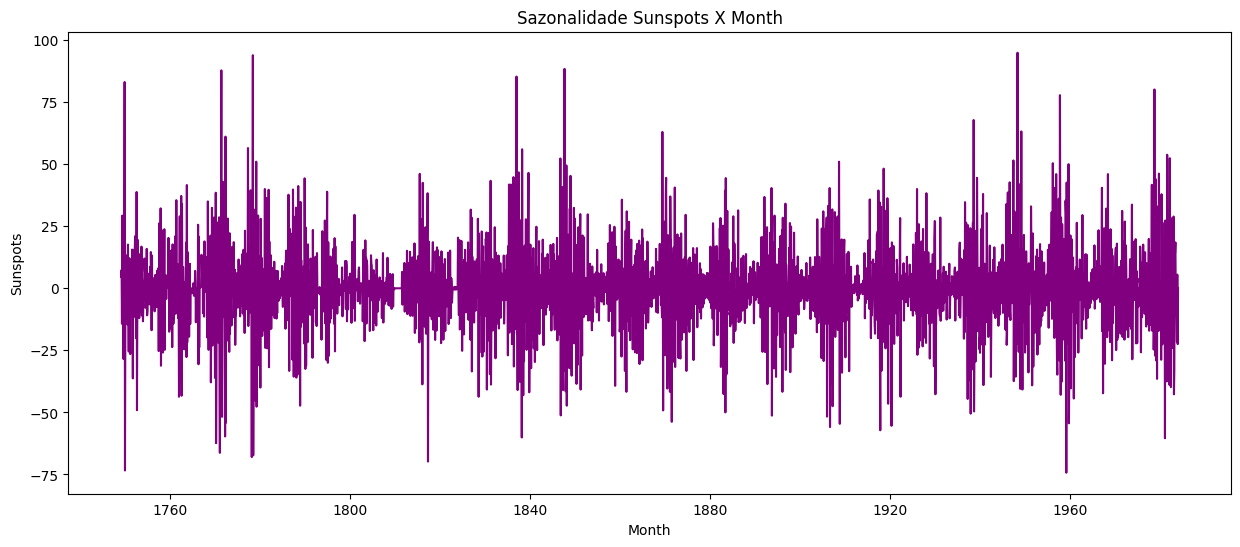

In [ ]:
questao3(dataset)

#CONCLUSÕES:

1.   É possivel concluir que o dataset apresenta grande variação devido à sazionalidade.
2. Com base nas informações apresentadas na questão 1, pode-se dizer que o melhor valor para as janelas é 2.
3. Com bases nos dados apresentados na questão 2, considerando um p-value de aproximadamente 0 e considerando um nivel de significancia de 5%, deve-se rejeitar a hipotese nula.


PARA ENTREGAR: Coverter seu YPYNB para PDF:

In [ ]:
%%shell
jupyter nbconvert --to html /content/TRABALHO_Análise_de_Série_Temporal.ipynb

[NbConvertApp] Converting notebook /content/TRABALHO_Análise_de_Série_Temporal.ipynb to html
[NbConvertApp] Writing 1118224 bytes to /content/TRABALHO_Análise_de_Série_Temporal.html
